<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Examples.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Examples: Saving and restoring models in Python
© ExploreAI Academy

In this notebook, we learn about pickling for saving and restoring a model. 

## Learning objectives

* Learn how to load standard sklearn datasets.
* Understand the principle of object serialisation.
* Learn how to save and restore an sklearn model.

## Introduction

Once a model is trained, it is best to **separate the model from the training code** and use it to make predictions going forward. This ensures the model is lightweight and efficient to put into **production**. 

We often do this by **'saving'** the model: 

>Saving a model entails storing its parameters and all information needed to make predictions.

For example, in the case of a model represented as `y = ax + b`, we would save the `a` and `b` parameters and the fact that it is a linear model.

At this point in the course, you should be familiar with how to train, test, and measure the performance of various machine learning models on a given dataset. In this train we cover how to **save** your models into a portable format and **deploy** them in the wild.

### Import libraries and data

Let's **import** a few Python libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

We'll use the **diabetes built-in dataset** which contains a set of predictive variables for predicting some quantitative measure of diabetes disease progression.

In [2]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

The **data description** can be shown as follows: 

In [3]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

Let's **create a DataFrame** using the data we have loaded above:

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['progression'] = pd.Series(data.target)

In [5]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


## 1. Training the model

Let's start by training a model that we can save later.  We'll build a **multiple linear regression** model on the sklearn's internal dataset. 

### Preprocessing

Having reviewed the data, we now perform a minimal amount of preprocessing to **prepare for model fitting** and **evaluation**:

In [6]:
# split data into X and y
y = df['progression']
X = df.drop('progression',axis=1)

# standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# get training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Model fitting and evaluation

We now fit our model to the data. For this example, we choose a **vanilla linear regression model**, however, we can still explore more complex models within `sklearn`.

In [7]:
# define the model
model = LinearRegression()

# fit the model
model.fit(X_train, y_train)

# get predictions on the test set
y_pred = model.predict(X_test)

# calculate performance metrics
print("MSE:",mean_squared_error(y_test, y_pred))

MSE: 2900.1936284934827


In cases where visualising how the model performs on the actual data is not possible (i.e. too many dimensions), we can plot the actual vs. the predicted `𝑦` values:

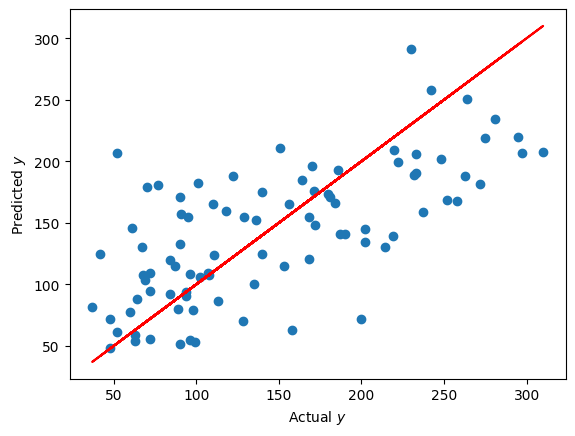

In [8]:
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,"r") # perfect model line
plt.ylabel("Predicted $y$")
plt.xlabel("Actual $y$")
plt.show()

At a glance, our MLR model seems to have decent performance. Now let's try to save it. 

## 2. Object serialisation

Object serialisation is the **storing of variables** and **their values** as a **file**. 

If we save a standard Python program (i.e. `.py` file), the program needs to be executed before variables can realise their values. 

For example, think of a saved Jupyter Notebook file (`.ipynb`) where we have to **re-execute all program cells** before we can continue working on our program. 

In the context of machine learning models, this means we have to **re-train our models** on the original train data before we can use them on other unseen data. 

>Object serialisation allows us to store our variables and their state as a file, which upon loading can restore the variable and the value it had when we saved it. 

This way, we can **save** our **sklearn models** along with **their optimal parameters** and **load** them later for reuse.

In this train, we will explore **`pickle`**, a common Python library for object serialisation. 

### Saving the model with Pickle

Files saved using `pickle` are called ***pickles*** and the process of making them is referred to as ***pickling*** (we know, they took the metaphor quite far...). 

Luckily for us, saving models using `pickle` follows a similar structure to that of creating or writing to a file in Python. 

In [9]:
# Importing the pickle library
import pickle

# Save the model just like we would a Python file
model_save_path = "mlr_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(model,file)

This creates a **portable `model.pkl` file** in the specified file path which we **can move** between computers, email to others, use for model versioning, etc. We can also use this file to **make predictions** in the future.

### Restoring the model with Pickle

As you might have guessed, restoring a pickled file is similar to reading a file.

In [10]:
# restore the model just like we would read a file
model_load_path = "mlr_model.pkl"
with open(model_load_path,'rb') as file:
    unpickled_model = pickle.load(file)

At this stage, we have loaded our saved model from the load path and loaded it into the `unpickled_model` variable.

### Using the model file to make predictions

**NB:** Imagine that we are now starting on a new Jupyter Notebook and this was all we put in it.
You will notice there is **no data** and **no training** in the code since the model is already trained and the training data are no longer needed.

All that's left now is to **load the data into the model** and get predictions:

In [11]:
# get predictions from unpickled model
y_pred = unpickled_model.predict(X_test)

At this point, we have model predictions that we can use wherever we want.

In [12]:
# calculate performance metrics
print("MSE:",mean_squared_error(y_test, y_pred))

MSE: 2900.1936284934827


### Things to keep in mind

In order to ensure that the behaviour of your **model is reproducible** after serialisation, you should keep the following in mind:

- **The Python environment dependencies** (version of Python packages): Make sure the model is deployed into an identical environment, i.e. `sklearn` versions are the same as in the model training environment.

- **The Python version**: It is unreasonable to expect a model trained using `Python 2.7` would work when restored to an environment with `Python 3.6`. As such, it is important to use consistent versions of Python.

**Note:** A new version of the Pandas package, `Pandas 2`, was released in April 2023. While it comes with added functionality, we continue to use `Pandas 1` in this train for stability purposes.

In [13]:
# Load data - pass 'Name' as our index column.
df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/fundamentals/football_players.csv', index_col='Name')

# Use the head() function to look at the first 5 rows.
df.head()

C:\Users\prisc\AppData\Local\Temp\ipykernel_18384\3842239110.py:2: DtypeWarning: Columns (14,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/fundamentals/football_players.csv', index_col='Name')


,Age,Nationality,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
Name,,,,,,,,,,,,,,,,,,,,,
Cristiano Ronaldo,32,Portugal,94,89,63,89,63,93,95,85,...,83,94,23,91,92,31,80,85,88,ST LW
L. Messi,30,Argentina,93,92,48,90,95,95,96,77,...,88,85,26,87,73,28,59,90,85,RW
Neymar,25,Brazil,92,94,56,96,82,95,92,75,...,81,80,33,90,78,24,53,80,83,LW
L. Suárez,30,Uruguay,92,88,78,86,60,91,83,77,...,83,87,38,77,89,45,80,84,88,ST
M. Neuer,31,Germany,92,58,29,52,35,48,70,15,...,55,25,11,61,44,10,83,70,11,GK


## Conclusion

Serialising your models can be extremely useful. Not only can you **save** your models but you can also **re-train** them later when more data are available.  

In this train, we covered how to:

- Train a multiple linear regression model.
- Save the model (i.e. trained model parameters) to a file.
- Restore a saved model and use it to make predictions.

#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>